## Chapter 4 [Spectroscopy](CH4_00-Spectroscopy.ipynb)


<hr style="height:1px;border-top:4px solid #FF8200" />

# EDS Detector Efficiency 


[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM/main/Spectroscopy/CH4_15-Detector.ipynb)
 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main//Spectroscopy/CH4_15-Detector.ipynb)

part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>


**Spring 2024**
<table style="margin-right:auto;margin-left:0px">
  <tr>
    <td>Gerd Duscher </td>
    <td>Khalid Hattar</td>
  </tr>
  <tr>
    <td>Microscopy Facilities</td> 
    <td> Tennessee Ion Beam Materials Laboratory </td>
  </tr>
  
  <tr>
    <td>Materials Science & Engineering</td>
    <td> Nuclear Engineering</td>
  </tr>
  <tr>
    <td>Institute of Advanced Materials & Manufacturing</td>
    <td> </td>
  </tr>
  <tr>
    <td colspan="2"><center> The University of Tennessee, Knoxville</center> </td>
  </tr>
</table>

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.

## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.2.3':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

done


## First we import the essential libraries
All we need here should come with the annaconda or any other package

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
if 'google.colab' in sys.modules:
    from google.colab import output
    from google.colab import drive
    output.enable_custom_widget_manager()

from pyTEMlib.xrpa_x_sections import x_sections

__notebook_version__ = '2023.01.22'
print('notebook version: ', __notebook_version__)

notebook version:  2023.01.22


## Bremsstrahlung and EDS Background

At low energies,  the [Bremsstrahlung](CH4_13-Bremsstrahlung.ipynb) above does not look anything like the background we obtain in the EDS spectrum.

This is due to the  response of the EDS detector system

![Detector_Efficiency](./images/DetectorEfficiency.png).


## Detector Response

The detector response depends on the material. The detected X-ray photons need to be absorbed in the Si detector. This absorption is then dependent on the silicon aborption coefficients (per energy).
Everything that absorbs X-ray photons before it reaches the detector crystal will weken the signal according to the photoabsorption in that material layers. Obviously we want to keep the thicknesses of those layers as thin as possible.

Let's look at the design of a detector:

![detector overview](images/Bruker3b.jpg)

![detector details](images/Bruker.jpg)

For the detector there is actually only one type common anymore (the liquid notrogen cooled Si(Li) detectors are phased out) and that is the Silicon droft detector (SDD):

![detector crystal](images/SDD2.jpg)

In front of the detector is usually a window. Only high vacuum system can have a window-less system otherwise ice would build up on the Peltier-cooled detector crystal.
This window is rather fragile and relative expensive to replace so be carfull with handling the detector system on that end.


![detector window](images/Window2.jpg)

## Signal - Photoelectric absorption of X-ray photon.

Whole energy of X-ray photon is transferred to inner shell electron of a silicon atom.

This ejected electron has now the kinetic energy of the X-ray photon minus its binding energy in the atom (K: 1838 eV, L: 98 eV)

The ejected electron undergoes inelastic scattering and creates electron hole pairs (valence to conduction band) in the process (besides other effects)

Charge generation process requires about 3.6 eV per electron hole pair

So the number of created charge carriers $𝑛$ is proportional to the original photon energy $𝐸_𝑝$:

$$ n =  \frac{E_p} {3.6 eV} $$

    
    

## Detector Efficiency
### Photoabsorption 
If we only look at the crystal we see that we have a contact and the Silicon crystal. However there is also a thin deadlayer on the top of the crystal that will absorb X-rays without detecting it.
We will talk more about detectors in the **EDS resolution section**

Detection and wekening of the signal through absorption are both governed by photoabsorption cross section.

The mass absorption coefficiencts  $ \mu/ \rho$ (a function of energy) are taken from the [Mass Absorption Coefficients from NIST](https://physics.nist.gov/PhysRefData/FFast/html/form.html)

Select the element and as *Type of Data* select **Mass Photoabsorption Coefficient (cm^2/g)**

I collected all the data in a pickled dictionary which we open below and then test the content.


Edges of Si:
M2 :  0.005 keV
M1 :  0.011 keV
L3 :  0.099 keV
L2 :  0.099 keV
L1 :  0.149 keV
K1 :  1.839 keV


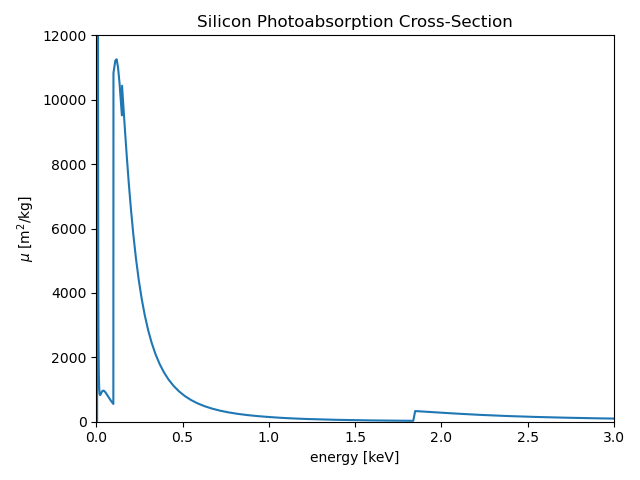

In [2]:
shell_occupancy={'K1':2, 'L1':2, 'L2':2, 'L3':4, 'M1':2, 'M2':2, 'M3':4,'M4':4,'M5':6, 
                        'N1':2, 'N2':2,' N3':4,'N4':4,'N5':6, 'N6':6,'N7':8,
                        'O1':2, 'O2':2,' O3':4,'O4':4,'O5':6, 'O6':6,'O7':8, 'O8':8, 'O9': 10 }

Z = 14
print(f"Edges of {x_sections[str(Z)]['name']}:")
for key in x_sections[str(Z)]:
    if key in shell_occupancy.keys():
      print(f"{key:3s}:  {x_sections[str(Z)][key]['onset']/1e3:.3f} keV")
plt.figure()
plt.plot( x_sections[str(Z)]['ene']/1000., x_sections[str(Z)]['dat']/x_sections[str(Z)]['photoabs_to_sigma']/1e10*0.1)
plt.xlim(0,3)

plt.ylim(0,1.2e4)
            
plt.xlabel('energy [keV]')
plt.ylabel('$\mu$ [m$^2$/kg]')
plt.title('Silicon Photoabsorption Cross-Section')
plt.tight_layout();

# Detector Efficiency
### Absorption
Absorption probability $P(E)$ is related t the mass aborption coefficient  with:

$$ P(E) = I/I_0 =\exp\left[ -(\mu/\rho) * \rho * t\right] = \exp\left[ -\mu* t\right]$$

with
- $I_0$: initial intensity of X-rays
- $I$:  intensity of X-rays after going through thickness $t$
- $\rho$: density of material 
 
### Detector 

The detector response $P_D$ is given by Small et al. as:
Here, we assume the contact to be Al and the dead layer is of course Si like the detector crystal:

$$ \Large 
\begin{align}
P_D = &(\exp(\mu_{Al}(E) *t_{Al} *\rho_{Al})) * (\exp(\mu_{Si}(E) *t_{dead layer} *\varrho_{Si} )) \\
&\times (1- \exp(\mu_{Si}(E) *t_{detector} *\varrho_{Si} ))
\end{align} $$


In [4]:
import pickle
pkl_file = open('data/ffast.pkl', 'rb')
ffast = pickle.load(pkl_file)
pkl_file.close()

In [5]:
x_sections['14'].keys(), ffast[14].keys()


(dict_keys(['name', 'barns', 'NumEdges', 'atomic_weight', 'nominal_density', 'photoabs_to_sigma', 'lines', 'fluorescent_yield', 'M2', 'M1', 'L3', 'L2', 'L1', 'K1', 'ene', 'dat']),
 dict_keys(['element', 'Z', 'atomic_weight', 'nominal_density', 'photoabs_to_sigma', 'f2_to_eV', 'number_of_edges', 'edges', 'E', 'f1', 'f2', 'photoabsorption', 'coh+incoh', 'total', 'lines']))

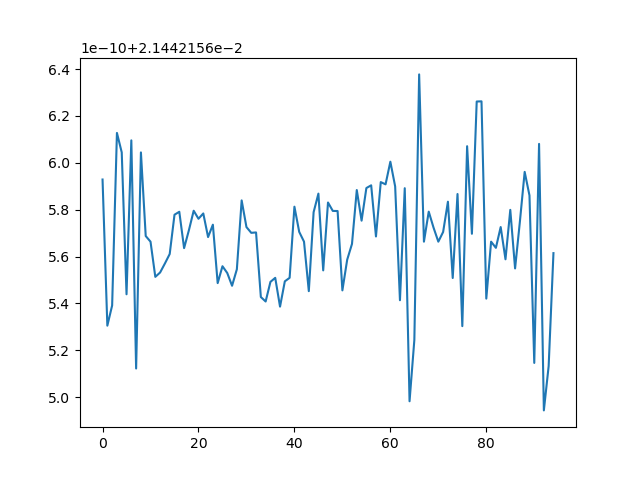

In [6]:
plt.figure()
plt.plot(ffast[14]['photoabsorption'][5:100]*1e10/x_sections['14']['dat'][5:100])
#plt.plot(ffast[14]['photoabsorption']*1e10)

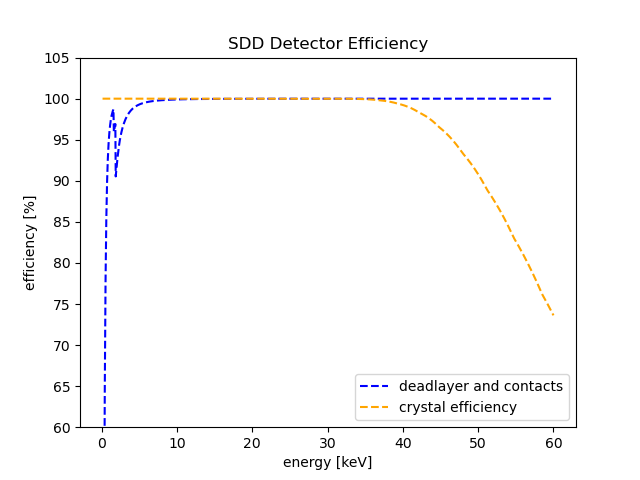

In [8]:
from scipy.interpolate import interp1d
import scipy.constants as const


## layer thicknesses of commen materials in EDS detectors in m
nickelLayer = 0.* 1e-9 # in m
alLayer = 30 *1e-9    # in m
goldLayer = 0.* 1e-9   # in m
deadLayer = 100 *1e-9  # in m
detector_thickness = 45 * 1e-3  # in m

area = 30 * 1e-6 #in m2
oo4pi = 1.0 # / (4.0 * np.pi)* np.radians(10)*2

#We make a linear energy scale 
energy_scale = np.linspace(.1,60,1199)*1000


## interpolate mass absorption coefficient to our energy scale
photoabsorption = x_sections['14']['dat']/1e10/x_sections['14']['photoabs_to_sigma']
lin = interp1d(x_sections['14']['ene'], photoabsorption,kind='linear') 
mu_Si = lin(energy_scale) * x_sections['14']['nominal_density']*100. #1/cm -> 1/m

## interpolate mass absorption coefficient to our energy scale

photoabsorption = x_sections['13']['dat']/1e10/x_sections['13']['photoabs_to_sigma']
lin = interp1d(x_sections['13']['ene'], photoabsorption,kind='linear') 
mu_Al = lin(energy_scale) * x_sections['13']['nominal_density']*100. #1/cm -> 1/m

 
detector_Efficiency1 = np.exp(-mu_Al * alLayer)* np.exp(-mu_Si * deadLayer)  * oo4pi
detector_Efficiency2 = (1.0 - np.exp(-mu_Si * detector_thickness)) * oo4pi;
detector_Efficiency =detector_Efficiency1 * detector_Efficiency2/  oo4pi;


plt.figure()
#plt.plot(energy_scale/1000, detector_Efficiency*100, label = 'detector efficieny', color = 'red')
plt.plot(energy_scale/1000, detector_Efficiency1*100, '--', label = 'deadlayer and contacts', color = 'blue')
plt.plot(energy_scale/1000, detector_Efficiency2*100, '--',label = 'crystal efficiency' , color = 'orange')
plt.xlabel('energy [keV]')
plt.ylabel('efficiency [%]')
plt.title('SDD Detector Efficiency')
plt.ylim(60,105)
plt.legend();

We see that the detector efficiency drops off after our maximum acceleration voltage of 30 keV in the SEM.

The background Bremsstrahlung will be absorbed at low energies as we expected.

Play around with the thickness values of the contact and deadlayer. 

What has the biggest impact?


## Effective Background


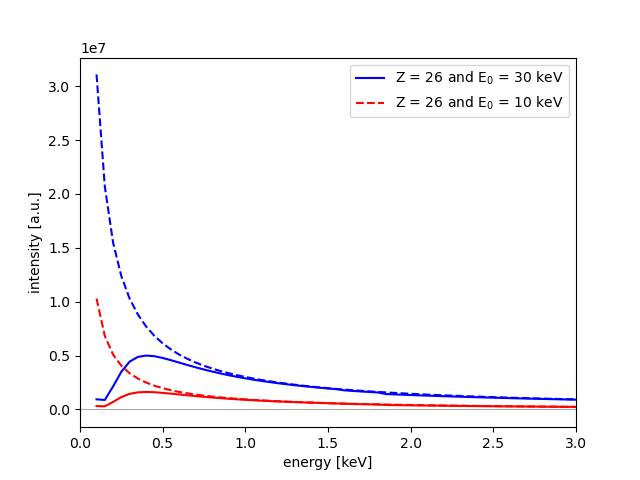

In [9]:
Z = 26
E_0 = 30 # keV

Z2 = 26
E_02 = 10


K = -4000
I = 1
E = energy_scale/1000 #= np.linspace(.1,30,2048) #in keV

N_E = I*K*Z*(E-E_0)/E
N_E2 = I*K*Z2*(E-E_02)/E

plt.figure()
plt.plot(energy_scale/1000, N_E, '--', color = 'blue');
plt.plot(energy_scale/1000, N_E*detector_Efficiency , color = 'blue', label = f'Z = {Z} and E$_0$ = {E_0} keV');
plt.plot(energy_scale/1000, N_E2, '--', color = 'red', label = f'Z = {Z2} and E$_0$ = {E_02} keV');
plt.plot(energy_scale/1000, N_E2*detector_Efficiency,  color = 'red');
plt.axhline(y=0., color='gray', linestyle='-', linewidth = 0.5);
plt.xlim(0,3)
plt.legend();

plt.ylabel('intensity [a.u.]')
plt.xlabel('energy [keV]');

In the curve above the change at the lower energiers is now as we expect it.

Please check the slope at about 1.8 keV which is caused by the Si-K edge absorption fo the deadlayer.

Change the values of *Z2* and the acceleration voltage *E_02* of the second curve to see the effects.

## Effect of Window

So far we have ignored the effect of the window in front of the X-ray detector. This window consists mostly of carbon being manufactured from polymer in a modern detector system. The exact composition is necessary to determine the effective background in an EDS spectrum.

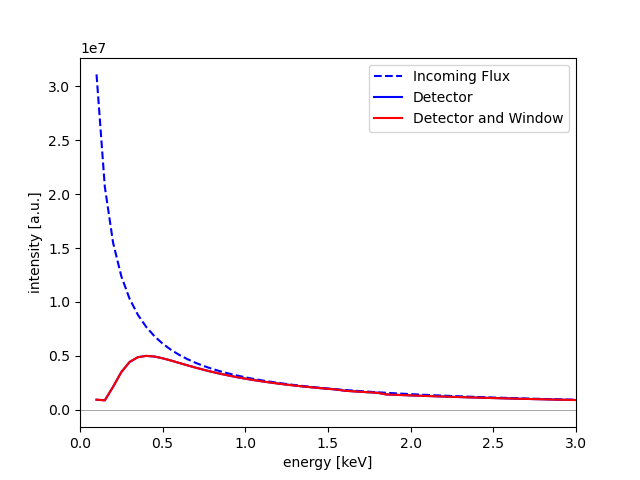

In [10]:
C_window = .0* 1e-6   # in m

## interpolate mass absorption coefficient to our energy scale
photoabsorption = x_sections['6']['dat']/x_sections['6']['photoabs_to_sigma']
lin = interp1d(x_sections['6']['ene'], photoabsorption,kind='linear') 
mu_C = lin(energy_scale) * x_sections['6']['nominal_density']*100. #1/cm -> 1/m


window_Absorption = np.exp(-mu_C * C_window)

plt.figure()
plt.plot(energy_scale/1000, N_E, '--', color = 'blue', label = 'Incoming Flux');
plt.plot(energy_scale/1000, N_E*detector_Efficiency , color = 'blue', label = f'Detector');
plt.plot(energy_scale/1000, N_E*detector_Efficiency * window_Absorption, color = 'red', label = f'Detector and Window');

plt.axhline(y=0., color='gray', linestyle='-', linewidth = 0.5);
plt.xlim(0,3)
plt.legend();

plt.ylabel('intensity [a.u.]')
plt.xlabel('energy [keV]');


## Background Slope at High Energies
While Kramers law gives the approximate shape of the background, the exact slopes is not reproduced.
Several authors intorduced a parametrized function of the Bremsstrahlung efficiency.

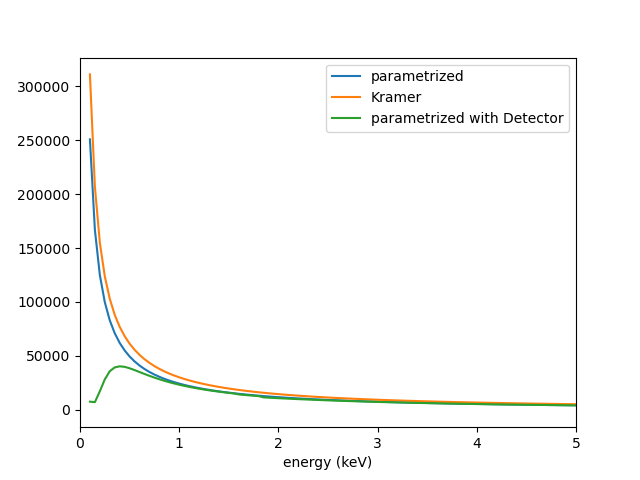

In [11]:
E = energy_scale/1000
Z = 26
E_0 = 30
a = [0, -73.9,1,2446,36.502,148.5, 0.1293,-0.006624,0.0002906]
g  = np.sqrt(Z)* (E_0-E)/E *(a[1]+a[2]*E+a[3]*np.log(Z)+a[4]*E**a[5]/Z)*(1+(a[6]+a[7]*E_0)*Z/E)


a = [0,54.86,1.072, 0.2835, 30.4,875,-0.08]
g2 = np.sqrt(Z)* (E_0-E)/E *(a[1]+a[2]+a[3]*E_0 +a[4]*np.log(Z)+a[5]*E_0**a[6]/Z**2)
b = [2000,-.6]
f = (b[0]+b[1]*E_0)*Z/E

plt.figure()
plt.plot(E,g2, label = 'parametrized')
plt.plot(E,N_E/100, label = 'Kramer')
plt.plot(E,g2*detector_Efficiency,label = 'parametrized with Detector')
plt.xlim(0,5)
plt.xlabel('energy (keV)')
plt.legend();

## Fitting Background

Neither Kramer's Law nor any of the parametrized versions of the Bremsstrahlung are usefull for fitting.

The following expression is used for fitting purposes:

$$ N(E) = \epsilon(E) A(E) \left[ p_0+ p_1 \frac{E_0-E}{E} + p_2 \frac{(E_0-E)^2}{E}  \right]$$

in which we have the fitting parameters ($p_0, p_1, p_2$) of a polynomial of the overvoltage.

(0.0, 4.0)

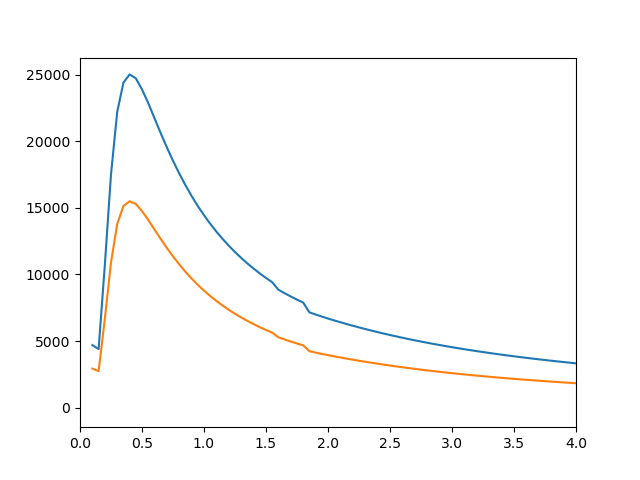

In [12]:
p = [10, 26, 10]
E = E
N = detector_Efficiency * (p[0] + p[1]*(E_0-E)/E + p[2]*(E_0-E)**2/E)

plt.figure()
plt.plot(E,N_E/200*detector_Efficiency)
plt.plot(E,N)

plt.xlim(0,4)

# Now we put all of that together

and make a function:

The input is in the form of a dictionary.

We note that we have several layers that reduce the efficiency and that the detector crystal itself is not really that importantfor the acceleration voltages in an SEM.


Text(0.5, 0, 'energy (keV)')

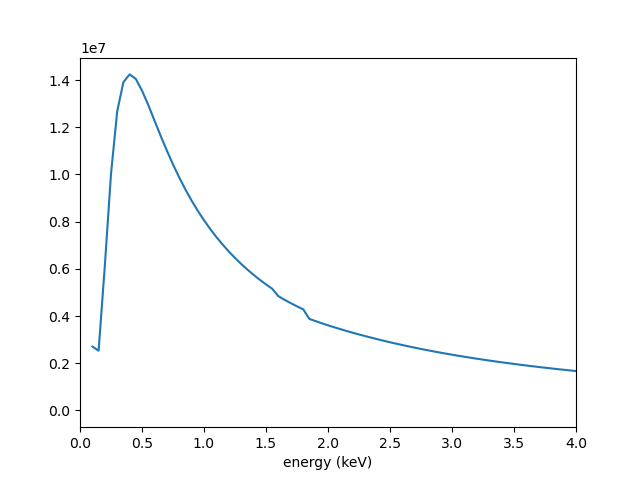

In [13]:
energy_scale = np.linspace(.1,60,1199)*1000

tags = {}

tags['acceleration_voltage_V'] = 30000

tags['detector'] ={}
tags['detector']['layers'] ={}

## layer thicknesses of commen materials in EDS detectors in m
tags['detector']['layers']['alLayer'] = {}
tags['detector']['layers']['alLayer']['thickness'] = 30 *1e-9    # in m
tags['detector']['layers']['alLayer']['Z'] = 13

tags['detector']['layers']['deadLayer'] = {}
tags['detector']['layers']['deadLayer']['thickness'] =  100 *1e-9  # in m
tags['detector']['layers']['deadLayer']['Z'] = 14

tags['detector']['layers']['window'] = {}
tags['detector']['layers']['window']['thickness'] =  0.0 *1e-9  # in m
tags['detector']['layers']['window']['Z'] = 6

tags['detector']['detector'] = {}
tags['detector']['detector']['thickness'] = 45 * 1e-3  # in m
tags['detector']['detector']['Z'] = 14
tags['detector']['detector']['area'] = 30 * 1e-6 #in m2
## interpolate mass absorption coefficient to our energy scale


def detector_response(detector_definition,energy_scale):
    response = np.ones(len(energy_scale))
    for key in detector_definition['layers']:
        Z = detector_definition['layers'][key]['Z']
        t = detector_definition['layers'][key]['thickness']
        photoabsorption = x_sections[str(Z)]['dat']/1e10/x_sections[str(Z)]['photoabs_to_sigma']
        lin = interp1d(x_sections[str(Z)]['ene'], photoabsorption,kind='linear') 
        mu = lin(energy_scale) * x_sections[str(Z)]['nominal_density']*100. #1/cm -> 1/m

        absorption = np.exp(-mu * t)
        response = response*absorption
    Z = detector_definition['detector']['Z']
    t = detector_definition['detector']['thickness']    
    photoabsorption = x_sections[str(Z)]['dat']/1e10/x_sections[str(Z)]['photoabs_to_sigma']
    lin = interp1d(x_sections[str(Z)]['ene'], photoabsorption,kind='linear') 
    mu = lin(energy_scale) * x_sections[str(Z)]['nominal_density']*100. #1/cm -> 1/m
    response = response*(1.0 - np.exp(-mu * t))# * oo4pi;
    return(response)


p = [10, 26, 10]

def EDS_Background(p,tags,energy_scale):
    E_0= tags['acceleration_voltage_V']

    detector_efficiency = detector_response(tags['detector'],energy_scale)
    E = energy_scale
    N = detector_efficiency * (p[0] + p[1]*(E_0-E)/E + p[2]*(E_0-E)**2/E)
    return N

background = EDS_Background(p,tags,energy_scale)

plt.figure()
plt.plot(energy_scale/1000, background)
plt.xlim(0,4)
plt.xlabel('energy (keV)')

## Navigation
- <font size = "3">  **Back: [Characteristic X-Rays](CH4_14-Characteristic_X_Rays.ipynb)** </font>
- <font size = "3">  **Next: [Analyze Spectrum](CH4_16-Analyze_EDS_Spectrum.ipynb)** </font>
- <font size = "3">  **Chapter 4: [Spectroscopy](CH4_00-Spectroscopy.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>
